In [11]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir, makedirs

%matplotlib inline

In [2]:
def crop_brain_contour(image):
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            
    
    return new_image

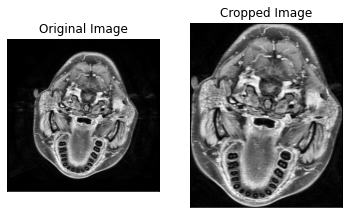

In [3]:
ex_img = cv2.imread('waterT1C/30-T4N2, 24_pre_waterT1C.nii-0010.png')
ex_new_img = crop_brain_contour(ex_img, True)

In [4]:
cv2.imwrite('30-T4N2, 24_pre_waterT1C.nii-0010_new.png', ex_new_img)

True

In [6]:
listdir('waterT1C/')

['30-T4N2, 24_pre_waterT1C.nii-0019.png',
 '30-T4N2, 24_pre_waterT1C.nii-0018.png',
 '30-T4N2, 24_pre_waterT1C.nii-0015.png',
 '30-T4N2, 24_pre_waterT1C.nii-0014.png',
 '30-T4N2, 24_pre_waterT1C.nii-0016.png',
 '30-T4N2, 24_pre_waterT1C.nii-0017.png',
 '30-T4N2, 24_pre_waterT1C.nii-0013.png',
 '30-T4N2, 24_pre_waterT1C.nii-0012.png',
 '30-T4N2, 24_pre_waterT1C.nii-0010.png',
 '30-T4N2, 24_pre_waterT1C.nii-0011.png']

In [7]:
image_list = listdir('waterT1C/')

In [8]:
print(str(image_list))

['30-T4N2, 24_pre_waterT1C.nii-0019.png', '30-T4N2, 24_pre_waterT1C.nii-0018.png', '30-T4N2, 24_pre_waterT1C.nii-0015.png', '30-T4N2, 24_pre_waterT1C.nii-0014.png', '30-T4N2, 24_pre_waterT1C.nii-0016.png', '30-T4N2, 24_pre_waterT1C.nii-0017.png', '30-T4N2, 24_pre_waterT1C.nii-0013.png', '30-T4N2, 24_pre_waterT1C.nii-0012.png', '30-T4N2, 24_pre_waterT1C.nii-0010.png', '30-T4N2, 24_pre_waterT1C.nii-0011.png']


In [9]:
for img_dir in listdir('waterT1C/'):
    print(img_dir)

30-T4N2, 24_pre_waterT1C.nii-0019.png
30-T4N2, 24_pre_waterT1C.nii-0018.png
30-T4N2, 24_pre_waterT1C.nii-0015.png
30-T4N2, 24_pre_waterT1C.nii-0014.png
30-T4N2, 24_pre_waterT1C.nii-0016.png
30-T4N2, 24_pre_waterT1C.nii-0017.png
30-T4N2, 24_pre_waterT1C.nii-0013.png
30-T4N2, 24_pre_waterT1C.nii-0012.png
30-T4N2, 24_pre_waterT1C.nii-0010.png
30-T4N2, 24_pre_waterT1C.nii-0011.png


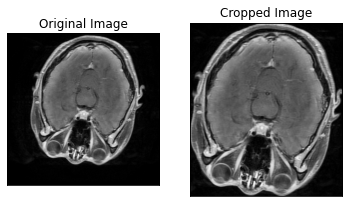

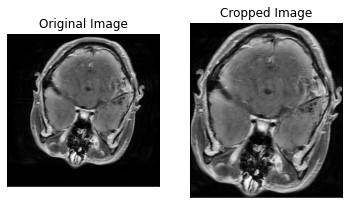

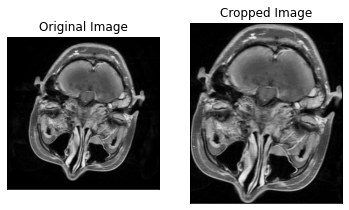

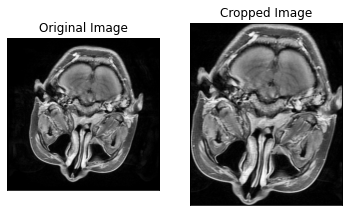

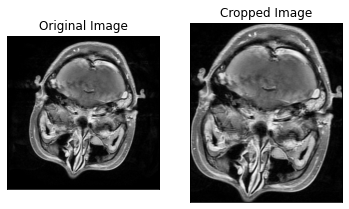

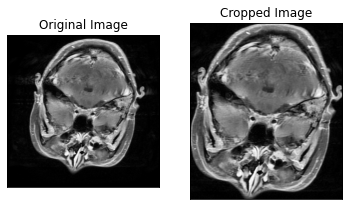

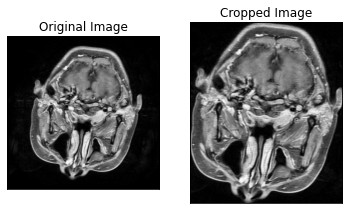

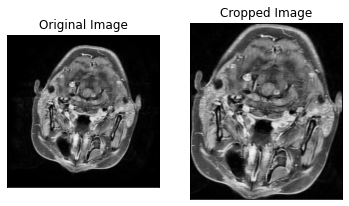

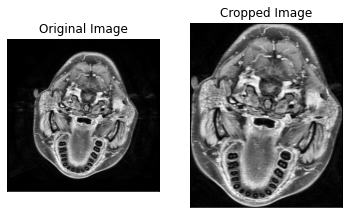

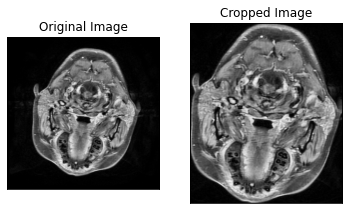

In [15]:
makedirs('waterT1CProcessed')
for img_dir in listdir('waterT1C/'):
    ex_new_img = crop_brain_contour(cv2.imread('waterT1C/'+img_dir), True)
    cv2.imwrite('waterT1CProcessed/'+img_dir, ex_new_img)